### **Insall nessaray libraries and packages**

In [ ]:
!pip install utils

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline
import pandas as pd

In [ ]:
!pip install livelossplot

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')

In [ ]:
from keras.utils import to_categorical
from sklearn.utils import shuffle

**Load the dataset**

In [ ]:
TRAIN_DIR_Male = '/content/drive/MyDrive/FER2013_CK+/Male/Train/'
TEST_DIR_Male = '/content/drive/MyDrive/FER2013_CK+/Male/Test/'

# **Preprocess the datasets**

**Read Images from the data path**

In [ ]:
import cv2

In [ ]:
TRAIN_DIR_Male = '/content/drive/MyDrive/FER2013_CK+/Male/Train/'
data_dir_sequence = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad']


img_data_list = []
emotion_counts_tr_male = {}

for dataset in data_dir_sequence:
    img_list = os.listdir(os.path.join(TRAIN_DIR_Male, dataset))
    count = len(img_list)
    emotion_counts_tr_male[dataset] = count
    print('Loaded {} images for the dataset-{}\n'.format(count, dataset))
    for img in img_list:
        input_img = cv2.imread(os.path.join(TRAIN_DIR_Male, dataset, img))
        if input_img is not None:
            input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            img_data_list.append(input_img)
        else:
            print(f"Failed to read image: {img}")

img_data_train_male = np.array(img_data_list)
img_data_train_male = img_data_train_male.astype('float32')
img_data_train_male = img_data_train_male/ 255

# img_data_train_male = img_data_train_male.reshape(-1, 48, 48)  # Reshape the array to (total_count, 48, 48)

print("Emotion Counts:")
for emotion, count in emotion_counts_tr_male.items():
    print("{}: {}".format(emotion, count))


Loaded 2823 images for the dataset-angry

Loaded 480 images for the dataset-disgust

Loaded 2235 images for the dataset-fear

Loaded 2713 images for the dataset-happy

Loaded 3208 images for the dataset-neutral

Loaded 2643 images for the dataset-sad

Failed to read image: desktop.ini
Emotion Counts:
angry: 2823
disgust: 480
fear: 2235
happy: 2713
neutral: 3208
sad: 2643


In [ ]:
img_data_train_male.shape

(14101, 48, 48)

In [ ]:
TEST_DIR_Male = '/content/drive/MyDrive/FER2013_CK+/Male/Test/'
data_dir_sequence = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad']


img_data_list = []
emotion_counts_te_male = {}

for dataset in data_dir_sequence:
    img_list = os.listdir(os.path.join(TEST_DIR_Male, dataset))
    count = len(img_list)
    emotion_counts_te_male[dataset] = count
    print('Loaded {} images for the dataset-{}\n'.format(count, dataset))
    for img in img_list:
        input_img = cv2.imread(os.path.join(TEST_DIR_Male, dataset, img))
        if input_img is not None:
            input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            img_data_list.append(input_img)
        else:
            print(f"Failed to read image: {img}")

img_data_test_male = np.array(img_data_list)
img_data_test_male = img_data_test_male.astype('float32')
img_data_test_male = img_data_test_male/ 255

# img_data_test_male = img_data_test_male.reshape(-1, 48, 48)  # Reshape the array to (total_count, 48, 48)

print("Emotion Counts:")
for emotion, count in  emotion_counts_te_male.items():
    print("{}: {}".format(emotion, count))

Loaded 555 images for the dataset-angry

Loaded 75 images for the dataset-disgust

Loaded 451 images for the dataset-fear

Loaded 553 images for the dataset-happy

Loaded 646 images for the dataset-neutral

Loaded 537 images for the dataset-sad

Emotion Counts:
angry: 555
disgust: 75
fear: 451
happy: 553
neutral: 646
sad: 537


In [ ]:
img_data_test_male.shape

(2817, 48, 48)

**Distribution of datasets**

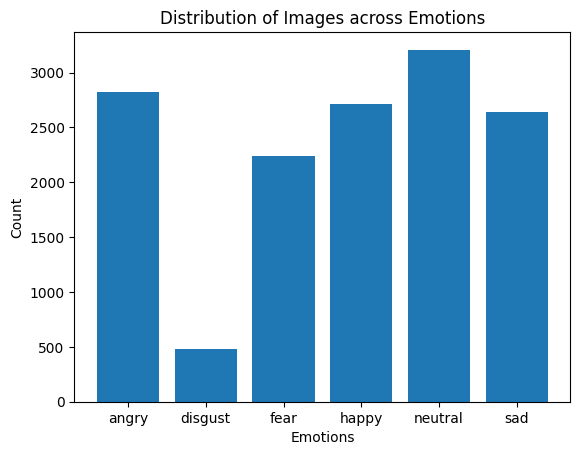

In [ ]:
emotions_tr_ma = list(emotion_counts_tr_male.keys())
counts_tr_ma = list(emotion_counts_tr_male.values())

# Create a bar chart
plt.bar(emotions_tr_ma, counts_tr_ma)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Images across Emotions')
plt.show()

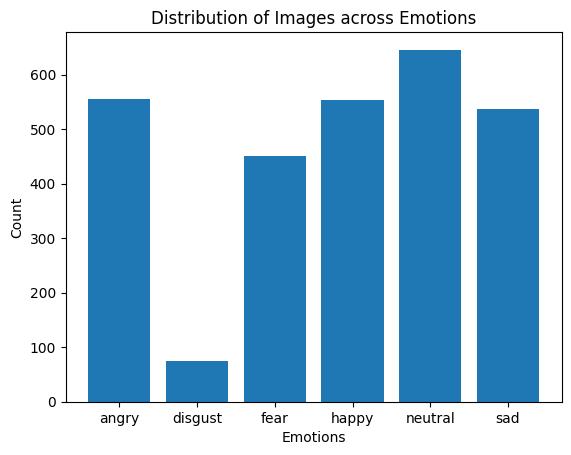

In [ ]:
emotions_ts_me = list(emotion_counts_te_male.keys())
counts_ts_me = list(emotion_counts_te_male.values())

# Create a bar chart
plt.bar(emotions_ts_me, counts_ts_me)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Images across Emotions')
plt.show()

**Define the number of classes**

In [ ]:
from keras.utils import to_categorical

num_classes = 6
num_of_samples_tr_male = img_data_train_male.shape[0]

labels_train_male = np.ones((num_of_samples_tr_male,), dtype='int64')
labels_train_male[0:2823] = 5  # 2823 Angry
labels_train_male[2823:3303] = 4  #  480 Disgust
labels_train_male[3303:5538] = 3  # 2235 Fear
labels_train_male[5538:8251] = 0  # 2713nHappy
labels_train_male[8251:11459] = 2  # 3208  neutral
labels_train_male[11459:] = 1  # 2643 Sad
# labels_train_male[9088:] = 2  # Surprise

names = ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY']

def getLabel(id):
    return ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY'][id]

# labels_train_female_encoded = to_categorical(labels_train_female, num_classes=num_classes)

In [ ]:
labels_train_males = np.bincount(labels_train_male)

# Print the count of each label
for i, count in enumerate(labels_train_males):
    label_name = getLabel(i)
    print("{}: {}".format(label_name, count))

HAPPY: 2713
SAD: 2642
NEUTRAL: 3208
FEAR: 2235
DISGUST: 480
ANGRY: 2823


In [ ]:
from keras.utils import to_categorical

num_classes = 6
num_of_samples_te_male = img_data_test_male.shape[0]

labels_test_male = np.ones((num_of_samples_te_male,), dtype='int64')
labels_test_male[0:555] = 5  # 555 Angry
labels_test_male[555:630] = 4  # 75 Disgust
labels_test_male[630:1081] = 3  # 451 Fear 475
labels_test_male[1081:1634] = 0  # 553 Happy
labels_test_male[1634:2280] = 2  # 646 neutral
labels_test_male[2280:] = 1  # 537 Sad
# labels_test_male[2524:] = 2  642 # Surprise

names = ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY']

def getLabel(id):
    return ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY'][id]

# labels_train_female_encoded = to_categorical(labels_train_female, num_classes=num_classes)


In [ ]:
labels_test_males = np.bincount(labels_test_male)

# Print the count of each label
for i, count in enumerate(labels_test_males):
    label_name = getLabel(i)
    print("{}: {}".format(label_name, count))

HAPPY: 553
SAD: 537
NEUTRAL: 646
FEAR: 451
DISGUST: 75
ANGRY: 555


In [ ]:
print(labels_test_male.shape,labels_train_male.shape)

(2817,) (14101,)


**Convert the class label to one-hot encoding**

In [ ]:
# convert class labels to on-hot encoding# conve
Y_ma_tr = to_categorical(labels_train_male, num_classes)
Y_ma_ts = to_categorical(labels_test_male, num_classes)

In [ ]:
print(Y_ma_tr.shape,Y_ma_ts.shape)

(14101, 6) (2817, 6)


**Shuffle the dataset**

In [ ]:
#Shuffle the dataset
x_train_male,y_train_male = shuffle(img_data_train_male,Y_ma_tr, random_state=2)
x_test_male,y_test_male = shuffle(img_data_test_male,Y_ma_ts, random_state=2)

In [ ]:
X_train_male = x_train_male
Y_train_male = y_train_male
X_test_male = x_test_male
Y_test_male = y_test_male

In [ ]:
print(X_train_male.shape,Y_train_male.shape,X_test_male.shape,Y_test_male.shape)

(14101, 48, 48) (14101, 6) (2817, 48, 48) (2817, 6)


In [ ]:
# X_train_male = np.stack((X_train_male,)*3, axis = -1)
# X_test_male  = np.stack((X_test_male ,)*3, axis = -1)

In [ ]:
X_train_male = X_train_male.reshape(X_train_male.shape[0], X_train_male.shape[1], X_train_male.shape[2], 1)
X_test_male =X_test_male.reshape(X_test_male.shape[0], X_test_male.shape[1], X_test_male.shape[2], 1)

# **Handling imbalncing**

**Class weights**

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight="balanced",
    classes=np.unique(labels_train_male),
    y=labels_train_male
)

class_weights = dict(zip(np.unique(labels_train_male), class_weights))

In [ ]:
class_weights

{0: 0.8662612114510382,
 1: 0.8895407519555892,
 2: 0.7325955943474647,
 3: 1.0515287099179718,
 4: 4.8961805555555555,
 5: 0.8325067894674696}

**Data Augmentation**

In [ ]:
# datagen = ImageDataGenerator(rotation_range=10)

In [ ]:
# from keras.utils.data_utils import Sequence
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.tensorflow import balanced_batch_generator

# class BalancedDataGenerator(Sequence):
#     """ImageDataGenerator + RandomOversampling"""
#     def __init__(self, x, y, datagen, batch_size=32):
#         self.datagen = datagen
#         self.batch_size = min(batch_size, x.shape[0])
#         datagen.fit(x)
#         self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)
#         self._shape = (self.steps_per_epoch * batch_size, *x.shape[1:])

#     def __len__(self):
#         return self.steps_per_epoch

#     def __getitem__(self, idx):
#         x_batch, y_batch = self.gen.__next__()
#         x_batch = x_batch.reshape(-1, *self._shape[1:])
#         return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        samplewise_std_normalization=False,  # divide each input by its std
                        zca_whitening=False,
                        rotation_range=20,
                        shear_range = 20,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True,
                        vertical_flip=False)


balanced_gen_male = data_generator.flow(X_train_male,Y_train_male,)

In [ ]:
# Create an instance of the data generator

# # datagen = ImageDataGenerator(rotation_range=10,)
# balanced_gen_male = BalancedDataGenerator(X_train_male,Y_train_male, datagen, batch_size=32)
# # balanced_gen_val_male = BalancedDataGenerator(X_test_male, Y_test_male, datagen, batch_size=32)

**Learning Rate Scheduler**

In [ ]:
# filepath = '/content/drive/MyDrive/Reserch/best_model_cifar10_male.hdf5'
# from tensorflow.keras.callbacks import Callback
# from tensorflow.keras.callbacks import EarlyStopping


# checkpoint = ModelCheckpoint(filepath=filepath,
#                              monitor='val_accuracy',
#                              verbose=1,
#                              save_best_only=True)

# stop = EarlyStopping(monitor='val_accuracy', patience =5,
#                       verbose=0, mode='auto', baseline=None,
#                       restore_best_weights=False)

# callbacks = [checkpoint,stop,callback_lr]

In [ ]:
# from keras import layers


# **Model Buliding**

In [ ]:
from keras import layers
from keras.models import Sequential
from keras.regularizers import l2  # Import l2 function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense, Input, Add ,AveragePooling2D
from keras.models import Model
from keras.initializers import glorot_uniform


In [ ]:
batch_size = 32
num_epochs = 150
input_shape = (48, 48, 1)
verbose = 1
num_classes = 6
base_path = './model/'
l2_regularization=0.01

In [ ]:
filepath = '/content/drive/MyDrive/Reserch/models/best_model_cifar10_maletrtest.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

In [ ]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback

patience = 25

early_stop = EarlyStopping('val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1, patience=int(patience/2), verbose=1)


callbacks = [checkpoint,early_stop,reduce_lr]

In [ ]:
pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
def identity_block(X, f, filters, stage, block,dropout_rate=0.2):
    """
    Implementation of the identity block

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network

    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. You'll need this later to add back to the main path.
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)


    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    X = Activation('relu')(X)
    X = Dropout(dropout_rate)(X)  # Add dropout layer


    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X_shortcut,X])
    X = Activation("relu")(X)

    return X
    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2,dropout_rate=0.2):
    """
    Implementation of the convolutional block4

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used

    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a',padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(F2, (f, f), strides = (1,1), name = conv_name_base + '2b',padding = 'same', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(F3, (1, 1), strides = (1,1), name = conv_name_base + '2c',padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '1',padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    X = Activation('relu')(X)
    X = Dropout(dropout_rate)(X)  # Add dropout layer

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X_shortcut,X])
    X = Activation("relu")(X)

    return X

In [ ]:
def Net50(input_shape = (48,48,1), classes = 6 , dropout_rate=0.2):

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)


    # Zero-Padding
    #X = ZeroPadding2D((1, 1))(X_input)
    X = X_input
    # Stage 1

    X = Conv2D(8, (3, 3), strides = (1, 1), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    # removed maxpool
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [32, 32, 128], stage = 2, block='a', s = 1,dropout_rate=dropout_rate)
    X = identity_block(X, 3, [32, 32, 128], stage=2, block='b')
    X = identity_block(X, 3, [32, 32, 128], stage=2, block='c')


    # Stage 3
    X = convolutional_block(X, f = 3, filters = [64,64,256], stage = 3, block='a', s = 2,dropout_rate=dropout_rate)
    X = identity_block(X, 3, [64,64,256], stage=3, block='b')
    X = identity_block(X, 3, [64,64,256], stage=3, block='c')
    X = identity_block(X, 3, [64,64,256], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 4, block='a', s = 2,dropout_rate=dropout_rate)
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='d')
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='e')
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='f')

    # Stage 5
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 5, block='a', s = 2,dropout_rate=dropout_rate)
    X = identity_block(X, 3, [256, 256, 1024], stage=5, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=5, block='c')

    # AVGPOOL .
    X = AveragePooling2D((2,2), name='avg_pool')(X)

    # output layer
    X = Flatten()(X)
    X = Dense(512, activation = 'relu', name='fc1024' , kernel_initializer = glorot_uniform(seed=0))(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)


    # Create model
    model = Model(inputs = X_input, outputs = X, name='Net50')

    return model

# **Train the model**

In [ ]:
from keras.optimizers import Adam, SGD
model = Net50(input_shape = (48, 48, 1), classes = 6,dropout_rate=0.2)
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "Net50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 46, 46, 8)    80          ['input_1[0][0]']                
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 46, 46, 8)    32          ['conv1[0][0]']                  
                                                                                                  
 activation (Activation)        (None, 46, 46, 8)    0           ['bn_conv1[0][0]']               
                                                                                              

In [ ]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [ ]:
history = model.fit(balanced_gen_male, steps_per_epoch=len(X_train_male) /batch_size, epochs=num_epochs, verbose=1, class_weight=class_weights,callbacks=callbacks,validation_data= (X_test_male,Y_test_male))

Epoch 1/150
441/440 [==============================] - ETA: 0s - loss: 2.2180 - accuracy: 0.2343
Epoch 1: val_accuracy improved from -inf to 0.20696, saving model to /content/drive/MyDrive/Reserch/models/best_model_cifar10_maletrtest.hdf5
440/440 [==============================] - 76s 116ms/step - loss: 2.2180 - accuracy: 0.2343 - val_loss: 1.7043 - val_accuracy: 0.2070 - lr: 5.0000e-04
Epoch 2/150
441/440 [==============================] - ETA: 0s - loss: 1.6493 - accuracy: 0.2951
Epoch 2: val_accuracy improved from 0.20696 to 0.34150, saving model to /content/drive/MyDrive/Reserch/models/best_model_cifar10_maletrtest.hdf5
440/440 [==============================] - 47s 107ms/step - loss: 1.6493 - accuracy: 0.2951 - val_loss: 1.5708 - val_accuracy: 0.3415 - lr: 5.0000e-04
Epoch 3/150
441/440 [==============================] - ETA: 0s - loss: 1.5781 - accuracy: 0.3420
Epoch 3: val_accuracy improved from 0.34150 to 0.37416, saving model to /content/drive/MyDrive/Reserch/models/best_model

In [ ]:
loss, accuracy = model.evaluate(X_test_male,Y_test_male)

89/89 [==============================] - 2s 26ms/step - loss: 1.0170 - accuracy: 0.6631


**Prediction results**

In [ ]:
# Assuming you have a trained model named 'model' and training data X_train and corresponding labels Y_train

# Define the emotion label mapping
label_mapping = {
    0: "happy",
    1: "sad",
    2: "neutral",
    3: "fear",
    4: "disgust",
    5: "angry"
}

# Make predictions on the training data
Y_pred = model.predict(X_train_male)

# Select a few examples to display
num_examples = 10
indices = np.random.randint(0, len(X_train_male), num_examples)

# Display the predicted and actual labels for the selected examples
for index in indices:
    predicted_label = np.argmax(Y_pred[index])  # Get the index of the predicted class with the highest probability
    actual_label = np.argmax(Y_train_male[index])  # Get the index of the actual class
    predicted_emotion = label_mapping[predicted_label]
    actual_emotion = label_mapping[actual_label]
    print("Example {}: Predicted label = {}, Actual label = {}".format(index, predicted_emotion, actual_emotion))


441/441 [==============================] - 11s 24ms/step
Example 3012: Predicted label = happy, Actual label = happy
Example 5945: Predicted label = sad, Actual label = sad
Example 5412: Predicted label = angry, Actual label = angry
Example 5477: Predicted label = sad, Actual label = sad
Example 2636: Predicted label = neutral, Actual label = angry
Example 2192: Predicted label = angry, Actual label = angry
Example 7706: Predicted label = neutral, Actual label = neutral
Example 8477: Predicted label = sad, Actual label = sad
Example 9282: Predicted label = fear, Actual label = fear
Example 7595: Predicted label = sad, Actual label = disgust


In [ ]:
def plotting_epochs(training_, validation_, lossOrAccu):
  plt.figure(figsize=[6,4])
  plt.plot(training_, 'black', linewidth=2.0)
  plt.plot(validation_, 'blue', linewidth=2.0)
  plt.legend(['Training '+lossOrAccu, 'Validation '+lossOrAccu], fontsize=14)
  plt.xlabel('Epochs', fontsize=10)
  plt.ylabel(lossOrAccu, fontsize=10)
  plt.title(lossOrAccu+' Curves', fontsize=12)

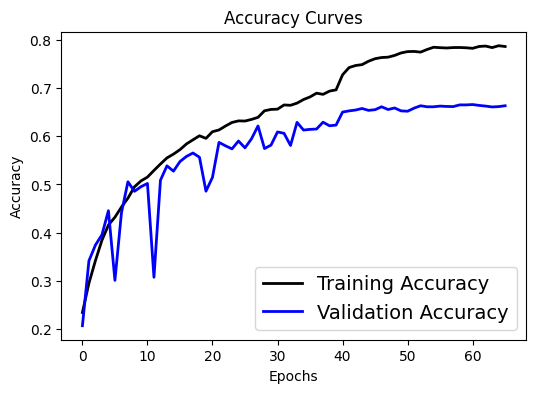

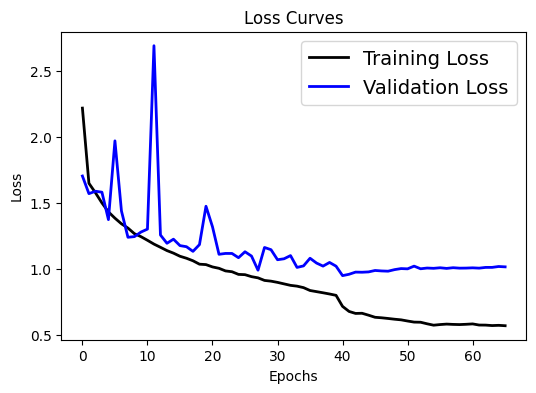

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], "Accuracy")
plotting_epochs(history.history['loss'], history.history['val_loss'], "Loss")

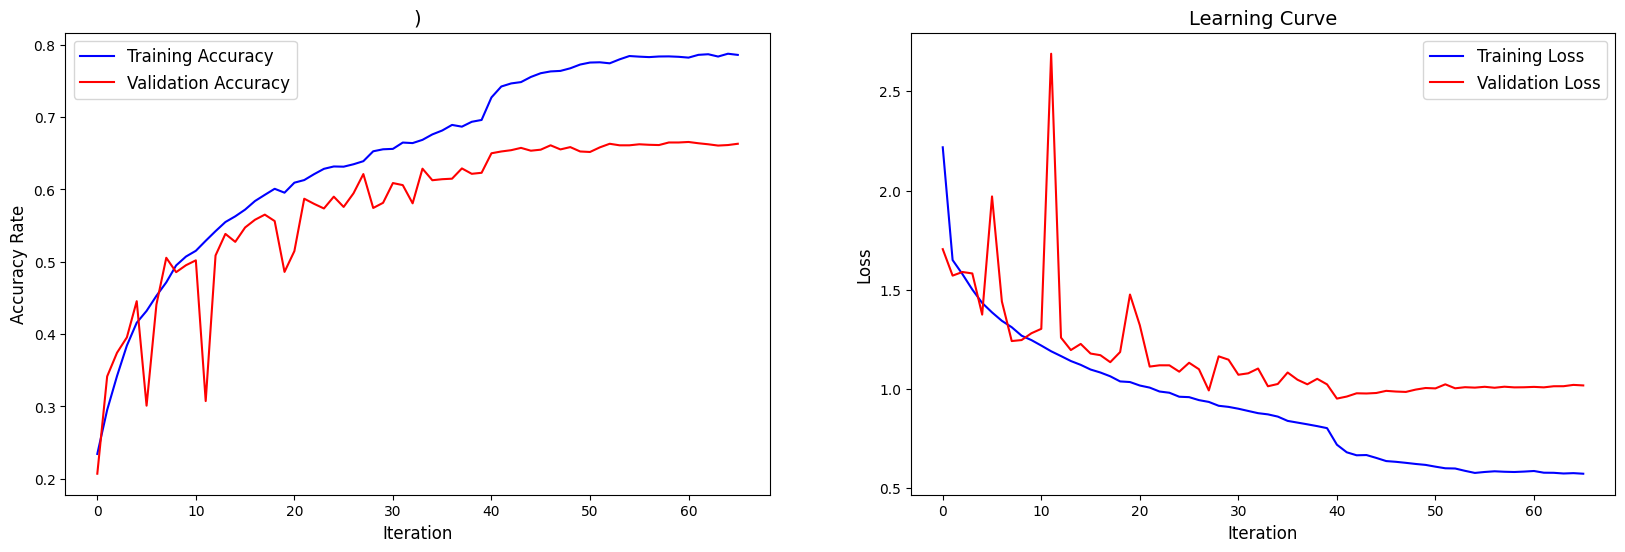

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))

ax1.plot(history.history['accuracy'],'b', history.history['val_accuracy'], 'r')
ax1.set_ylabel('Accuracy Rate',fontsize=12)
ax1.set_xlabel('Iteration',fontsize=12)
ax1.set_title(')',fontsize=14)

ax1.legend(['Training Accuracy','Validation Accuracy'],fontsize=12,loc='best')

ax2.plot(history.history['loss'], 'b',history.history['val_loss'],'r')
ax2.set_ylabel('Loss',fontsize=12)
ax2.set_xlabel('Iteration',fontsize=12)
ax2.set_title('Learning Curve',fontsize=14)
ax2.legend(['Training Loss','Validation Loss'],fontsize=12,loc='best')

# plt.savefig('crosse_results.png')
plt.show()

89/89 [==============================] - 2s 24ms/step


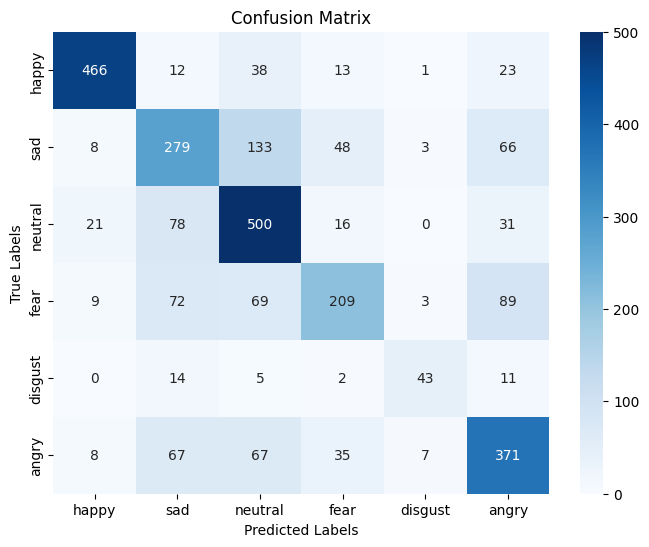

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a trained model named 'model' and test data X_test with corresponding true labels Y_test

# Make predictions on the test data
Y_pred = model.predict(X_test_male)

# Get the class labels with the highest probability for each prediction
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels for the test data
y_true = np.argmax(Y_test_male, axis=1)

# Assuming you have the true labels (y_true) and predicted labels (y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a list of class labels
class_labels = ['happy', 'sad', 'neutral', 'fear', 'disgust', 'angry']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:

from sklearn.metrics import classification_report

# Assuming you have a trained model named 'model' and test data X_test and corresponding labels Y_test

# Make predictions on the test data
Y_pred = model.predict(X_test_male)
predicted_labels = np.argmax(Y_pred, axis=1)

# Generate classification report
report = classification_report(np.argmax(Y_test_male, axis=1), predicted_labels)

print(report)

89/89 [==============================] - 2s 23ms/step
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       553
           1       0.53      0.52      0.53       537
           2       0.62      0.77      0.69       646
           3       0.65      0.46      0.54       451
           4       0.75      0.57      0.65        75
           5       0.63      0.67      0.65       555

    accuracy                           0.66      2817
   macro avg       0.68      0.64      0.65      2817
weighted avg       0.67      0.66      0.66      2817



In [ ]:
# import dlib
# from PIL import Image
# from skimage import io, color
# import matplotlib.pyplot as plt

# def detect_faces(image):
#     # Create a face detector
#     face_detector = dlib.get_frontal_face_detector()

#     # Convert image to RGB if it's in a different format
#     if image.ndim == 2:
#         # Grayscale image
#         image = color.gray2rgb(image)
#     elif image.ndim == 4:
#         # RGBA image
#         image = image[..., :3]

#     # Run detector and get bounding boxes of the faces in the image
#     detected_faces = face_detector(image, 1)
#     face_frames = [(x.left(), x.top(), x.right(), x.bottom()) for x in detected_faces]

#     return face_frames

# # Load image
# img_path = '/content/drive/MyDrive/photos/S057_001_00000019.png'
# image = io.imread(img_path)

# # Detect faces
# detected_faces = detect_faces(image)
# tab_faces = []
# # Crop faces and plot
# for n, face_rect in enumerate(detected_faces):
#     face = Image.fromarray(image).crop(face_rect)
#     tab = np.asarray(face)
#     tab_faces.append(tab)
#     plt.subplot(1, len(detected_faces), n+1)
#     plt.axis('off')
#     plt.imshow(face)

# plt.show()


In [ ]:
# image_to_predict = np.asarray(face)
# img = cv2.resize(image_to_predict,(48,48),1)

In [ ]:
# inv_dic = {
#     0: 'happy',
#     1: 'sad',
#     2: 'suprise',
#     3: 'fear',
#     4: 'disgust',
#     5: 'angry'
#     # Add more class labels and indices as needed
# }


In [ ]:
# tab = []
# tab.append(img)
# tab = np.array(tab)
# print(inv_dic[np.argmax(model.predict(tab))])
# # plt.imshow(tab[0],cmap = plt.cm.binary)

In [ ]:
# for img in tab_faces :
#   img = img = cv2.resize(img,(48,48),3)
#   tab = []
#   tab.append(img)
#   tab = np.array(tab)
#   print(inv_dic[np.argmax(model.predict(tab))])

In [ ]:
# # Load and display the original image
# original_image = Image.fromarray(image)
# plt.figure()
# plt.imshow(original_image)
# plt.axis('off')
# plt.show()

In [ ]:
# import dlib
# from PIL import Image
# from skimage import io, color
# import matplotlib.pyplot as plt

# def detect_faces(image):
#     # Create a face detector
#     face_detector = dlib.get_frontal_face_detector()

#     # Convert image to RGB if it's in a different format
#     if image.ndim == 2:
#         # Grayscale image
#         image = color.gray2rgb(image)
#     elif image.ndim == 4:
#         # RGBA image
#         image = image[..., :3]

#     # Run detector and get bounding boxes of the faces in the image
#     detected_faces = face_detector(image, 1)
#     face_frames = [(x.left(), x.top(), x.right(), x.bottom()) for x in detected_faces]

#     return face_frames

# # Load image
# img_path = '/content/drive/MyDrive/photos/S999_001_00000018.png'
# image = io.imread(img_path)

# # Detect faces
# detected_faces = detect_faces(image)
# tab_faces = []
# # Crop faces and plot
# for n, face_rect in enumerate(detected_faces):
#     face = Image.fromarray(image).crop(face_rect)
#     tab = np.asarray(face)
#     tab_faces.append(tab)
#     plt.subplot(1, len(detected_faces), n+1)
#     plt.axis('off')
#     plt.imshow(face)

# plt.show()

In [ ]:
# image_to_predict = np.asarray(face)
# img = cv2.resize(image_to_predict,(48,48),1)

In [ ]:
# inv_dic = {
#     0: 'happy',
#     1: 'sad',
#     2: 'suprise',
#     3: 'fear',
#     4: 'disgust',
#     5: 'angry'
#     # Add more class labels and indices as needed
# }


In [ ]:
# tab = []
# tab.append(img)
# tab = np.array(tab)
# print(inv_dic[np.argmax(model.predict(tab))])
# # plt.imshow(tab[0],cmap = plt.cm.binary)

In [ ]:
# for img in tab_faces :
#   img = img = cv2.resize(img,(48,48),3)
#   tab = []
#   tab.append(img)
#   tab = np.array(tab)
#   print(inv_dic[np.argmax(model.predict(tab))])

In [ ]:
# # Load and display the original image
# original_image = Image.fromarray(image)
# plt.figure()
# plt.imshow(original_image)
# plt.axis('off')
# plt.show()